<a href="https://colab.research.google.com/github/naveen-6735/Decoding-Fastag-Fraud/blob/main/Decoding_Fastag_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statement

This work aims to harness the power of machine learning classification methods to build a potent fraud detection mechanism for Fastag transactions.

The dataset used encompasses crucial attributes like transaction specifics, vehicle data, geographical coordinates, and transaction values. The objective is to construct a sturdy model capable of pinpointing fraudulent activities accurately, thereby safeguarding the integrity and security of Fastag transactions.





#Goal


The chief goal of this project is to leverage machine learning methodologies to construct a solid fraud detection framework for Fastag transactions.

By analyzing key parameters such as transaction details, vehicle data, location, and transaction amounts, the system aspires to accurately detect fraudulent activities, thereby safeguarding the integrity and security of Fastag transactions.



# Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
import sklearn
print(sklearn.__version__)
# check if any error encounter in streamlit ,then make sure your python package version and this version must be same!

1.2.2


In [ ]:
# !pip install --upgrade scikit-learn

# Read CSV File

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head(10)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud
6,7,1/12/2023 15:40,SUV,FTG-707-JKL-210,B-102,Express,Large,180,160,"13.059816123454882, 77.77068662374292",70,KA22MN4567,Fraud
7,8,1/13/2023 20:15,Bus,FTG-088-UVW-543,C-103,Regular,Large,350,90,"13.059816123454882, 77.77068662374292",88,KA21OP8901,Fraud
8,9,1/14/2023 1:55,Car,FTG-909-RST-876,A-101,Express,Small,120,0,"13.059816123454882, 77.77068662374292",45,KA16QR2345,Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud


# Data to EDA

In [ ]:
df.shape


(5000, 13)

In [ ]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         4451 non-null   int64 
 1   Timestamp              4451 non-null   object
 2   Vehicle_Type           4451 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            4451 non-null   object
 5   Lane_Type              4451 non-null   object
 6   Vehicle_Dimensions     4451 non-null   object
 7   Transaction_Amount     4451 non-null   int64 
 8   Amount_paid            4451 non-null   int64 
 9   Geographical_Location  4451 non-null   object
 10  Vehicle_Speed          4451 non-null   int64 
 11  Vehicle_Plate_Number   4451 non-null   object
 12  Fraud_indicator        4451 non-null   object
dtypes: int64(4), object(9)
memory usage: 486.8+ KB


In [ ]:
df=df.set_index('Transaction_ID')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,4451.0,180.927881,103.004437,0.0,110.0,140.0,300.0,350.0
Amount_paid,4451.0,158.684565,99.857565,0.0,100.0,120.0,180.0,350.0
Vehicle_Speed,4451.0,67.884745,16.632295,10.0,55.0,67.0,82.0,118.0


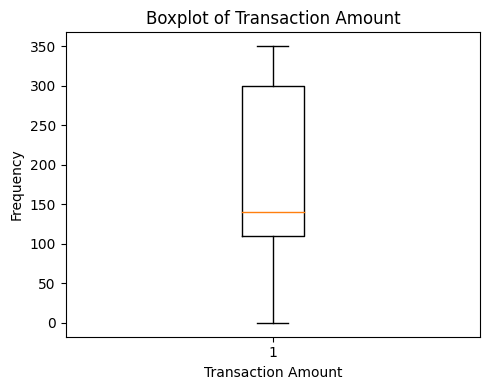

In [ ]:
plt.figure(figsize=(5,4))

plt.boxplot(df['Transaction_Amount'])
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Boxplot of Transaction Amount')


plt.tight_layout()
plt.show()

There is no outliers

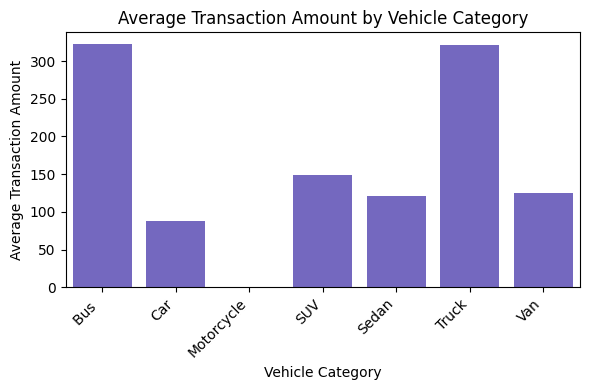

In [ ]:
avg_transaction_amounts = df.groupby('Vehicle_Type')['Transaction_Amount'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Vehicle_Type', y='Transaction_Amount', data=avg_transaction_amounts, color='#6A5ACD')
plt.xlabel('Vehicle Category')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Vehicle Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Buses and trucks are often used for commercial purposes, such as transporting goods or passengers, while cars and motorcycles are typically used for personal transportation. The higher transaction amounts for buses and trucks could indicate increased toll charges for commercial vehicles compared to personal vehicles.

In [ ]:
fraud_percentage = df['Fraud_indicator'].value_counts(normalize=True) * 100
fraud_percentage

Not Fraud    77.915075
Fraud        22.084925
Name: Fraud_indicator, dtype: float64

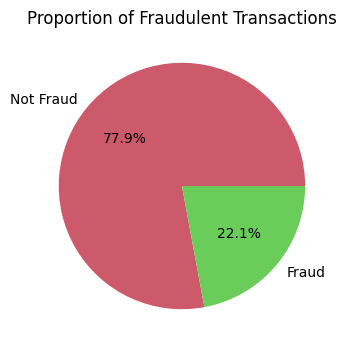

In [ ]:
plt.figure(figsize=(6,4))
df['Fraud_indicator'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#CD5A6A', '#6ACD5A'])
plt.title('Proportion of Fraudulent Transactions')
plt.ylabel('')
plt.show()


In [ ]:
fraud_by_vehicle = df.groupby('Vehicle_Type')['Fraud_indicator'].value_counts(normalize=True).unstack()
fraud_by_vehicle

Fraud_indicator,Fraud,Not Fraud
Vehicle_Type,,
Bus,0.247207,0.752793
Car,0.170868,0.829132
Motorcycle,NaN,1.000000
SUV,0.257703,0.742297
Sedan,0.225490,0.774510
Truck,0.221289,0.778711
Van,0.253501,0.746499


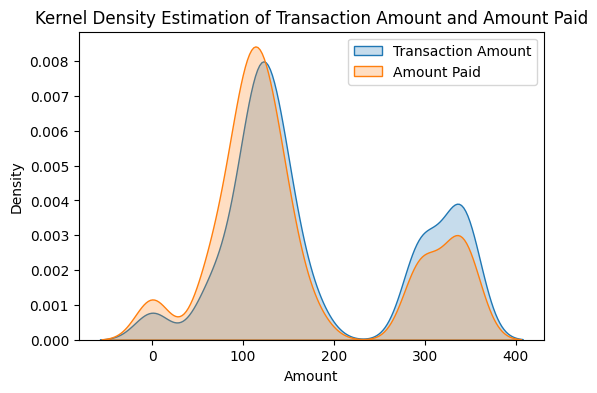

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df['Transaction_Amount'], fill=True, label='Transaction Amount')
sns.kdeplot(data=df['Amount_paid'], fill=True, label='Amount Paid')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Transaction Amount and Amount Paid')
plt.legend()
plt.show()

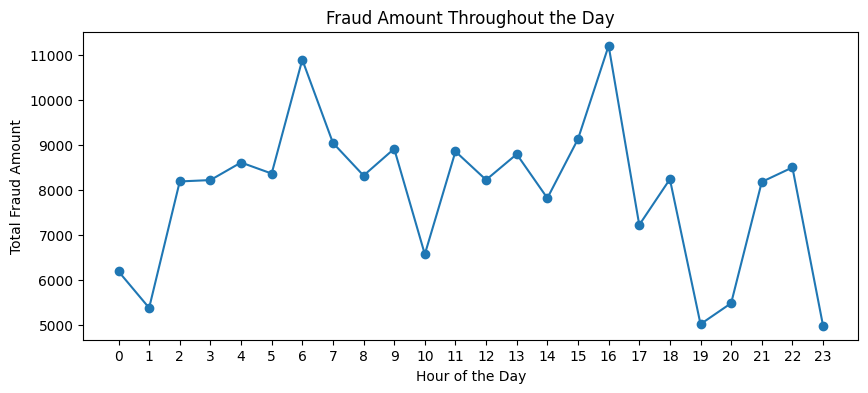

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract hour from the timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Filter fraudulent transactions
fraudulent_transactions = df[df['Fraud_indicator'] == 'Fraud']

# Group by hour and sum transaction amount
fraudulent_amount_by_hour = fraudulent_transactions.groupby('Hour')['Transaction_Amount'].sum()

plt.figure(figsize=(10, 4))
fraudulent_amount_by_hour.plot(marker='o', linestyle='-')
plt.title('Fraud Amount Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Fraud Amount')
plt.xticks(range(24))
plt.show()


Fraudulent activity peaks around 6 AM, possibly due to the start of the day or commuting hours.

Another peak is observed around 4 PM, likely linked to the end of the workday or rush hour traffic.

# Feature Engineering

In [ ]:
df['Day']=df['Timestamp'].dt.dayofweek

df['Month']=df['Timestamp'].dt.month

#### Transaction Behavior Features

In [ ]:
# Calculate the difference between "Transaction_Amount" and "Amount_paid"
df['Amount_Difference'] = df['Transaction_Amount'] - df['Amount_paid']

# Calculate the ratio of "Amount_paid" to "Transaction_Amount"
df['Payment_Ratio'] = df['Amount_paid'] / df['Transaction_Amount']


In [ ]:
df.head(10)

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Amount_Difference,Payment_Ratio
Transaction_ID,,,,,,,,,,,,,,,,,
1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,11,4,1,230,0.342857
2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,14,5,1,20,0.833333
4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,2,0,1,230,0.342857
5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,6,1,1,40,0.714286
6,2023-01-11 10:00:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud,10,2,1,60,0.625000
7,2023-01-12 15:40:00,SUV,FTG-707-JKL-210,B-102,Express,Large,180,160,"13.059816123454882, 77.77068662374292",70,KA22MN4567,Fraud,15,3,1,20,0.888889
8,2023-01-13 20:15:00,Bus,FTG-088-UVW-543,C-103,Regular,Large,350,90,"13.059816123454882, 77.77068662374292",88,KA21OP8901,Fraud,20,4,1,260,0.257143
9,2023-01-14 01:55:00,Car,FTG-909-RST-876,A-101,Express,Small,120,0,"13.059816123454882, 77.77068662374292",45,KA16QR2345,Fraud,1,5,1,120,0.000000
11,2023-01-16 12:10:00,Truck,FTG-021-QWE-765,C-103,Express,Large,350,120,"13.059816123454882, 77.77068662374292",58,KA12UV0123,Fraud,12,0,1,230,0.342857


# Encoding categorical features

In [ ]:
df = pd.get_dummies(df, columns=['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions'])

In [ ]:
label_encoder = LabelEncoder()
df['Fraud_indicator'] = label_encoder.fit_transform(df['Fraud_indicator'])

In [ ]:
df.head(3)

,Timestamp,FastagID,TollBoothID,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,...,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,Lane_Type_Express,Lane_Type_Regular,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1,2023-01-06 11:20:00,FTG-001-ABC-121,A-101,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,0,11,...,0,0,0,0,0,1,0,1,0,0
2,2023-01-07 14:55:00,FTG-002-XYZ-451,B-102,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,0,14,...,0,0,0,0,0,0,1,0,0,1
4,2023-01-09 02:05:00,FTG-044-LMN-322,C-103,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,0,2,...,0,0,0,1,0,0,1,1,0,0


In [ ]:
# Extract latitude and longitude from 'Geographical_Location'
df['Latitude'] = df['Geographical_Location'].apply(lambda x: float(x.split(',')[0]))
df['Longitude'] = df['Geographical_Location'].apply(lambda x: float(x.split(',')[1]))

# Drop the original 'Geographical_Location' column
df.drop(columns=['Geographical_Location'], inplace=True)

In [ ]:
df.head(3)

,Timestamp,FastagID,TollBoothID,Transaction_Amount,Amount_paid,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,...,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,Lane_Type_Express,Lane_Type_Regular,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Latitude,Longitude
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1,2023-01-06 11:20:00,FTG-001-ABC-121,A-101,350,120,65,KA11AB1234,0,11,4,...,0,0,0,1,0,1,0,0,13.059816,77.770687
2,2023-01-07 14:55:00,FTG-002-XYZ-451,B-102,120,100,78,KA66CD5678,0,14,5,...,0,0,0,0,1,0,0,1,13.059816,77.770687
4,2023-01-09 02:05:00,FTG-044-LMN-322,C-103,350,120,92,KA11GH3456,0,2,0,...,0,1,0,0,1,1,0,0,13.059816,77.770687


In [ ]:
df.Fraud_indicator.value_counts()

1    3468
0     983
Name: Fraud_indicator, dtype: int64

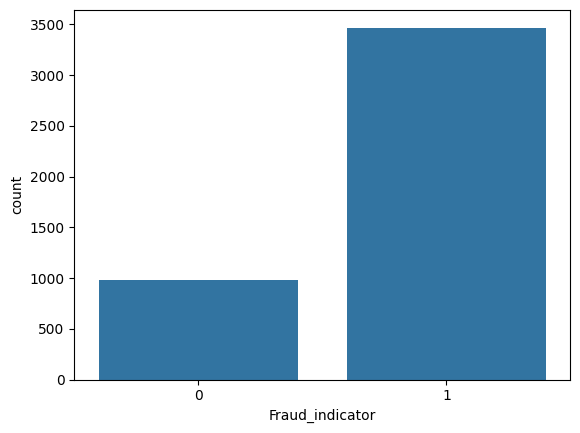

In [ ]:
#sns.countplot(df['Fraud_indicator'])
sns.countplot(x='Fraud_indicator', data=df)
plt.show()

# Splitting Dataset into Training and Testing Dataset

In [ ]:
# Separate features and target variable
X = df.drop(columns=['Fraud_indicator', 'Timestamp', 'FastagID', 'TollBoothID','Vehicle_Plate_Number'])
X

,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,Day,Month,Amount_Difference,Payment_Ratio,Vehicle_Type_Bus,Vehicle_Type_Car,...,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,Lane_Type_Express,Lane_Type_Regular,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Latitude,Longitude
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1,350,120,65,11,4,1,230,0.342857,1,0,...,0,0,0,1,0,1,0,0,13.059816,77.770687
2,120,100,78,14,5,1,20,0.833333,0,1,...,0,0,0,0,1,0,0,1,13.059816,77.770687
4,350,120,92,2,0,1,230,0.342857,0,0,...,0,1,0,0,1,1,0,0,13.059816,77.770687
5,140,100,60,6,1,1,40,0.714286,0,0,...,0,0,1,1,0,0,1,0,13.059816,77.770687
6,160,100,105,10,2,1,60,0.625000,0,0,...,1,0,0,0,1,0,1,0,13.059816,77.770687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,330,330,81,22,6,1,0,1.000000,0,0,...,0,1,0,0,1,1,0,0,13.213316,77.554135
4997,125,125,64,13,1,1,0,1.000000,0,0,...,0,0,1,1,0,0,1,0,13.213316,77.554135
4998,115,115,93,5,6,2,0,1.000000,0,0,...,1,0,0,0,1,0,1,0,13.213316,77.554135


In [ ]:
y = df['Fraud_indicator']
y

Transaction_ID
1       0
2       0
4       0
5       0
6       0
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: Fraud_indicator, Length: 4451, dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the features and transform the features
X_imputed = imputer.fit_transform(X)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_imputed, y)

feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 important features
top_n = 5
print(f"Top {top_n} Important Features:")
print(feature_importance_df.head(top_n))

Top 5 Important Features:
                     Feature  Importance
6          Amount_Difference    0.452377
7              Payment_Ratio    0.395232
1                Amount_paid    0.084303
0         Transaction_Amount    0.019677
19  Vehicle_Dimensions_Small    0.013704


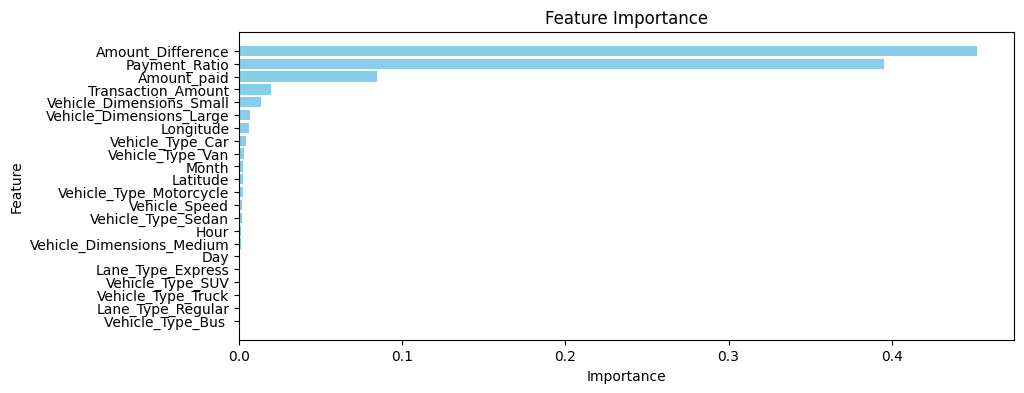

In [ ]:
plt.figure(figsize=(10, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#Model Building

In [ ]:
top_features = feature_importance_df.head(5)['Feature'].tolist()
X_top_features = X[top_features]
y = df['Fraud_indicator']

# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logistic_model = LogisticRegression()

# Initialize lists to store evaluation metrics
accuracies = []

# Perform cross-validation
for train_index, test_index in skf.split(X_top_features, y):
    X_train, X_test = X_top_features.iloc[train_index], X_top_features.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Fit the model
    logistic_model.fit(X_train_imputed, y_train)

    # Make predictions
    y_pred = logistic_model.predict(X_test_imputed)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
'''
# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy of stratified cross validation:", mean_accuracy)

# Display classification report using the entire dataset
X_imputed = imputer.fit_transform(X_top_features)
logistic_model.fit(X_imputed, y)
y_pred = logistic_model.predict(X_imputed)
print("Classification Report:")
print(classification_report(y, y_pred))
'''

'\n# Calculate mean accuracy\nmean_accuracy = np.mean(accuracies)\nprint("Mean Accuracy of stratified cross validation:", mean_accuracy)\n\n# Display classification report using the entire dataset\nX_imputed = imputer.fit_transform(X_top_features)\nlogistic_model.fit(X_imputed, y)\ny_pred = logistic_model.predict(X_imputed)\nprint("Classification Report:")\nprint(classification_report(y, y_pred))\n'

# Model Evaluation

In [ ]:
# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy of stratified cross validation:", mean_accuracy)

# Display classification report using the entire dataset
X_imputed = imputer.fit_transform(X_top_features)
logistic_model.fit(X_imputed, y)
y_pred = logistic_model.predict(X_imputed)
print("Classification Report:")
print(classification_report(y, y_pred))

Mean Accuracy of stratified cross validation: 0.9836002976077882
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       983
           1       0.98      1.00      0.99      3468

    accuracy                           0.98      4451
   macro avg       0.99      0.96      0.98      4451
weighted avg       0.98      0.98      0.98      4451



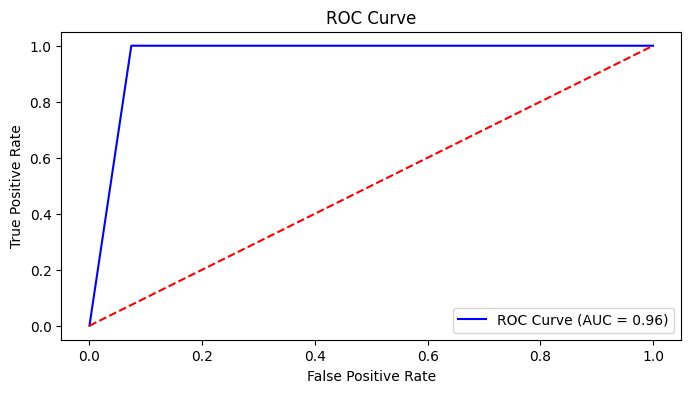

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

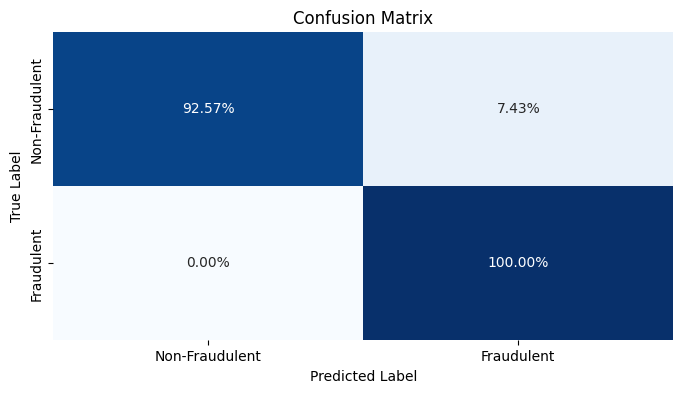

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

# Normalize confusion matrix
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize along the true labels (rows)

# Define class labels
class_labels = ['Non-Fraudulent', 'Fraudulent']

# Plot confusion matrix with probabilities
plt.figure(figsize=(8, 4))
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2%', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Model Generation

In [ ]:
import joblib

In [ ]:
import joblib
joblib.dump(rf_classifier,'Fastag_Fraud_Detection_Model')

['Fastag_Fraud_Detection_Model']

In [ ]:
model=joblib.load('Fastag_Fraud_Detection_Model')

In [ ]:
X.columns

Index(['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Hour', 'Day',
       'Month', 'Amount_Difference', 'Payment_Ratio', 'Vehicle_Type_Bus ',
       'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV',
       'Vehicle_Type_Sedan', 'Vehicle_Type_Truck', 'Vehicle_Type_Van',
       'Lane_Type_Express', 'Lane_Type_Regular', 'Vehicle_Dimensions_Large',
       'Vehicle_Dimensions_Medium', 'Vehicle_Dimensions_Small', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
model.predict([[500,245,42,12,5,3,255,0.49,0,1,1,0,0,0,1,1,0,1,0,1,13.059816,77.770687]])

array([0])

#Output


*   Not Fraud = 1
*       Fraud = 0


